In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import math
from sklearn.metrics import accuracy_score

In [17]:
data = pd.read_csv('xor.csv')

In [18]:
X = np.array(data)[:, :-1]
y = np.array(data)[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 4)

In [19]:
K_centers = 2
clf = KMeans(n_clusters = K_centers, max_iter = 100, n_init='auto')
clf.fit(X_train)
centers = clf.cluster_centers_

In [20]:
maxVal = 0 
for i in range(K_centers):
    for j in range(K_centers):
        d = np.linalg.norm(centers[i] - centers[j])
        maxVal = max(maxVal, d)
            
d = maxVal

sigma = d/math.sqrt(2*K_centers)

In [21]:
G = np.empty((X_train.shape[0], K_centers), dtype= float)

In [22]:
for i in range(X_train.shape[0]):
    for j in range(K_centers):
        dist = np.linalg.norm(X_train[i] - centers[j])
        G[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [23]:
GTG = np.dot(G.T,G)
GTG_inv = np.linalg.inv(GTG)
eq = np.dot(GTG_inv,G.T)
W = np.dot(eq, y_train)

In [24]:
G_test= np.empty((X_test.shape[0], K_centers), dtype= float)
for i in range(X_test.shape[0]):
    for j in range(K_centers):
        dist = np.linalg.norm(X_test[i] - centers[j])
        G_test[i][j]= math.exp(-math.pow(dist,2)/math.pow(2*sigma,2))

In [25]:
y_pred = np.dot(G_test, W)
y_pred = 0.5 * (np.sign(y_pred - 0.5) + 1)
# y_pred = sc.transform(y_pred)

score = accuracy_score(y_pred, y_test)
print("Accuracy: ", score.mean() * 100)

Accuracy:  100.0


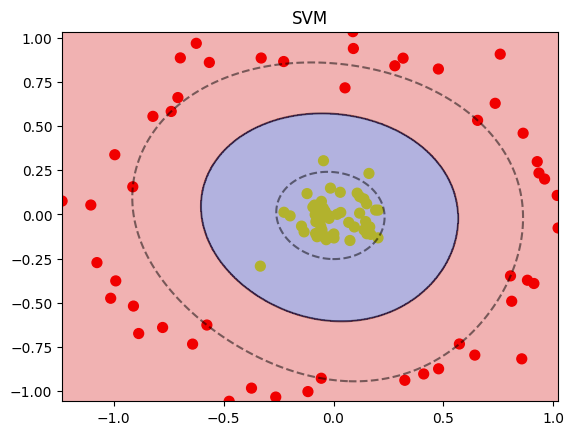

In [26]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs, make_circles
from matplotlib.colors import ListedColormap
from sklearn import svm
import matplotlib.pyplot as plt

def test_plot(X, y, svm_model, title):
    plt.plot()
    xlim = [np.min(X[:, 0]), np.max(X[:, 0])]
    ylim = [np.min(X[:, 1]), np.max(X[:, 1])]
    xx, yy = np.meshgrid(np.linspace(*xlim, num=700), np.linspace(*ylim, num=700))
    rgb=np.array([[210, 0, 0], [0, 0, 150]])/255.0
  
    svm_model.fit(X, y)
    z_model = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.contourf(xx, yy, np.sign(z_model.reshape(xx.shape)), alpha=0.3, levels=2, cmap=ListedColormap(rgb), zorder=1)
    plt.title(title)

X_train, y_train = make_circles(100, factor=.1, noise=.1)
# fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
test_plot(X_train, y_train, svm.SVC(kernel='rbf', C=2, max_iter=100, gamma=1), 'SVM')